In [488]:
import pandas as pd
import numpy as np
import sklearn
import time
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [489]:
df=pd.read_csv('player_season_preprocessed.csv')

In [490]:
players=pd.read_csv('players (1).csv')

In [491]:
players.drop(['main_position'],axis=1,inplace=True)

In [492]:
players.head()

,index,player_id,birth_date,height,agent,name,foot
0,0,33873,1987-06-20,199.0,NaN,Asmir Begovic,right
1,1,16810,1982-04-02,190.0,NaN,Marco Amelia,right
2,2,27511,1985-12-19,193.0,NaN,Gary Cahill,right
3,3,136610,1988-12-01,193.0,NaN,Papy Djilobodji,left
4,4,157490,1992-07-19,193.0,NaN,Michael Hector,right


In [493]:
df=df.merge(players,on='player_id',how='left')

In [494]:
df.head()

,player_id,Season,Age,Competition,Club,club_id,position_group,New_season,Squad,Appearances,...,Substitutions on,Substitutions off,Minutes played,Minutes per goal,index,birth_date,height,agent,name,foot
0,2857,17/18,32,Premier League,Leicester City,1003,Goalkeeper,False,10,2,...,0,0,180,0,928,1984-10-02,191.0,NaN,Eldin Jakupovic,right
1,2857,21/22,36,Premier League,Leicester City,1003,Goalkeeper,False,9,0,...,0,0,0,0,928,1984-10-02,191.0,NaN,Eldin Jakupovic,right
2,3333,17/18,31,Premier League,Liverpool FC,31,midfield,False,37,32,...,16,3,1763,0,199,1986-01-04,175.0,NaN,James Milner,right
3,3333,18/19,32,Premier League,Liverpool FC,31,midfield,False,33,31,...,12,7,1785,357,199,1986-01-04,175.0,NaN,James Milner,right
4,3333,19/20,33,Premier League,Liverpool FC,31,midfield,False,27,22,...,13,2,926,463,199,1986-01-04,175.0,NaN,James Milner,right


# preprocessing

In [495]:
df.drop_duplicates(inplace=True, keep='last')

In [496]:
df.shape 

(7432, 30)

In [497]:
df.drop(['New_season','player_id','Competition','Club','club_id','name','agent','agent','index','birth_date'],axis=1,inplace=True)

In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7432 entries, 0 to 7431
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Season               7432 non-null   object 
 1   Age                  7432 non-null   int64  
 2   position_group       7432 non-null   object 
 3   Squad                7432 non-null   int64  
 4   Appearances          7432 non-null   int64  
 5   PPG                  7432 non-null   float64
 6   Goals                7432 non-null   int64  
 7   Own goals            7432 non-null   int64  
 8   Clean sheets         7432 non-null   int64  
 9   Assists              7432 non-null   int64  
 10  Penalty goals        7432 non-null   int64  
 11  Goals conceded       7432 non-null   int64  
 12  Yellow cards         7432 non-null   int64  
 13  Second yellow cards  7432 non-null   int64  
 14  Red cards            7432 non-null   int64  
 15  Substitutions on     7432 non-null   i

In [499]:
df.head()

,Season,Age,position_group,Squad,Appearances,PPG,Goals,Own goals,Clean sheets,Assists,...,Goals conceded,Yellow cards,Second yellow cards,Red cards,Substitutions on,Substitutions off,Minutes played,Minutes per goal,height,foot
0,17/18,32,Goalkeeper,10,2,1.50,0,0,0,0,...,6,0,0,0,0,0,180,0,191.0,right
1,21/22,36,Goalkeeper,9,0,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,191.0,right
2,17/18,31,midfield,37,32,2.06,0,0,0,3,...,0,3,0,0,16,3,1763,0,175.0,right
3,18/19,32,midfield,33,31,2.52,5,0,0,5,...,0,5,1,0,12,7,1785,357,175.0,right
4,19/20,33,midfield,27,22,2.91,2,0,0,2,...,0,4,0,0,13,2,926,463,175.0,right


# Data EDA

1. Goolkeepers
2. Defender
3. Midfield
4. Attack

In [500]:
df.columns

Index(['Season', 'Age', 'position_group', 'Squad', 'Appearances', 'PPG',
       'Goals', 'Own goals', 'Clean sheets', 'Assists', 'Penalty goals',
       'Goals conceded', 'Yellow cards', 'Second yellow cards', 'Red cards',
       'Substitutions on', 'Substitutions off', 'Minutes played',
       'Minutes per goal', 'height', 'foot'],
      dtype='object')

plot each position in our target value column

In [501]:
counts=df['position_group'].value_counts()

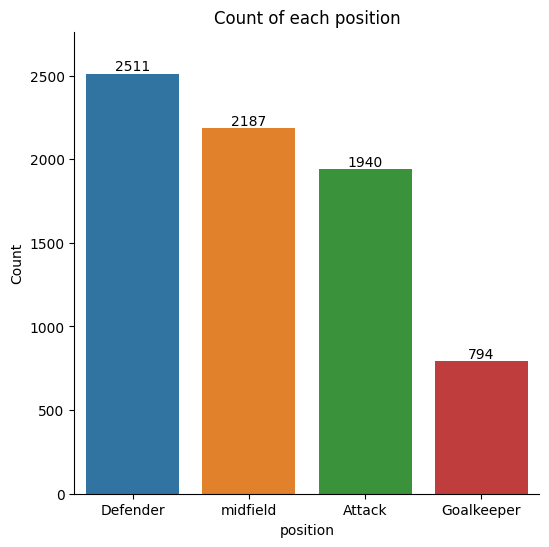

In [502]:
fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x=counts.index,y=counts.values, ax=ax)

# annotate
ax.bar_label(ax.containers[0], label_type='edge')

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)
plt.xlabel('position')
plt.ylabel('Count')
plt.title('Count of each position')
ax.spines[['right', 'top']].set_visible(False)
plt.show()

In [503]:
df['Season'].unique()

array(['17/18', '21/22', '18/19', '19/20', '20/21'], dtype=object)

In [504]:
df['Goals'].sort_values(ascending=False)

358     41
1701    36
359     35
357     34
5096    33
        ..
3508     0
3512     0
3513     0
3520     0
7431     0
Name: Goals, Length: 7432, dtype: int64

In [505]:
ct=pd.crosstab(df['Season'] , df['Goals'])
ct_filtered=ct.loc[:,ct.columns<6]
ct_filtered

Goals,0,1,2,3,4,5
Season,,,,,,
17/18,453,146,97,60,42,32
18/19,476,166,109,84,50,34
19/20,654,232,116,78,67,38
20/21,842,282,155,92,61,48
21/22,1425,325,188,107,88,66


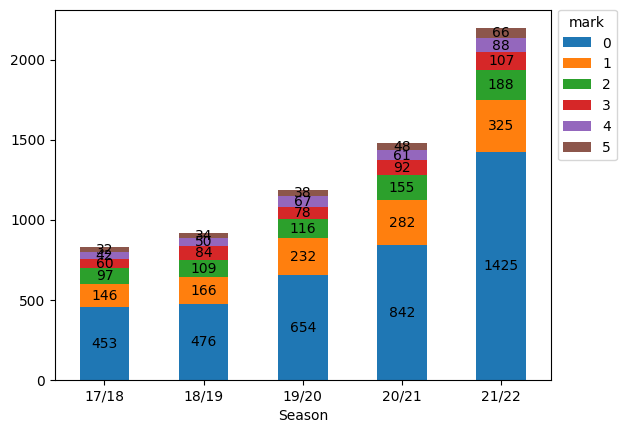

In [506]:
ax = ct_filtered.plot(kind='bar', stacked=True, rot=0)
ax.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

In [507]:
ct=pd.crosstab(df[df['position_group']=='Attack']['Season'] , df[df['position_group']=='Attack']['Goals'])
ct

Goals,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,41
Season,,,,,,,,,,,,,,,,,,,,,
17/18,66,32,20,17,19,14,11,7,8,9,...,1,3,1,0,1,0,0,0,0,0
18/19,53,25,18,26,15,16,21,12,9,11,...,0,0,0,0,0,1,0,0,0,0
19/20,78,41,29,26,34,22,15,8,15,10,...,1,0,0,1,0,0,1,0,1,0
20/21,121,49,39,32,30,20,25,17,15,20,...,1,1,0,0,0,0,0,0,0,1
21/22,258,68,51,36,40,37,30,12,18,10,...,1,0,0,0,0,0,0,1,0,0


# Check the distribution of variables

In [508]:
df.columns

Index(['Season', 'Age', 'position_group', 'Squad', 'Appearances', 'PPG',
       'Goals', 'Own goals', 'Clean sheets', 'Assists', 'Penalty goals',
       'Goals conceded', 'Yellow cards', 'Second yellow cards', 'Red cards',
       'Substitutions on', 'Substitutions off', 'Minutes played',
       'Minutes per goal', 'height', 'foot'],
      dtype='object')

Text(0, 0.5, 'Count')

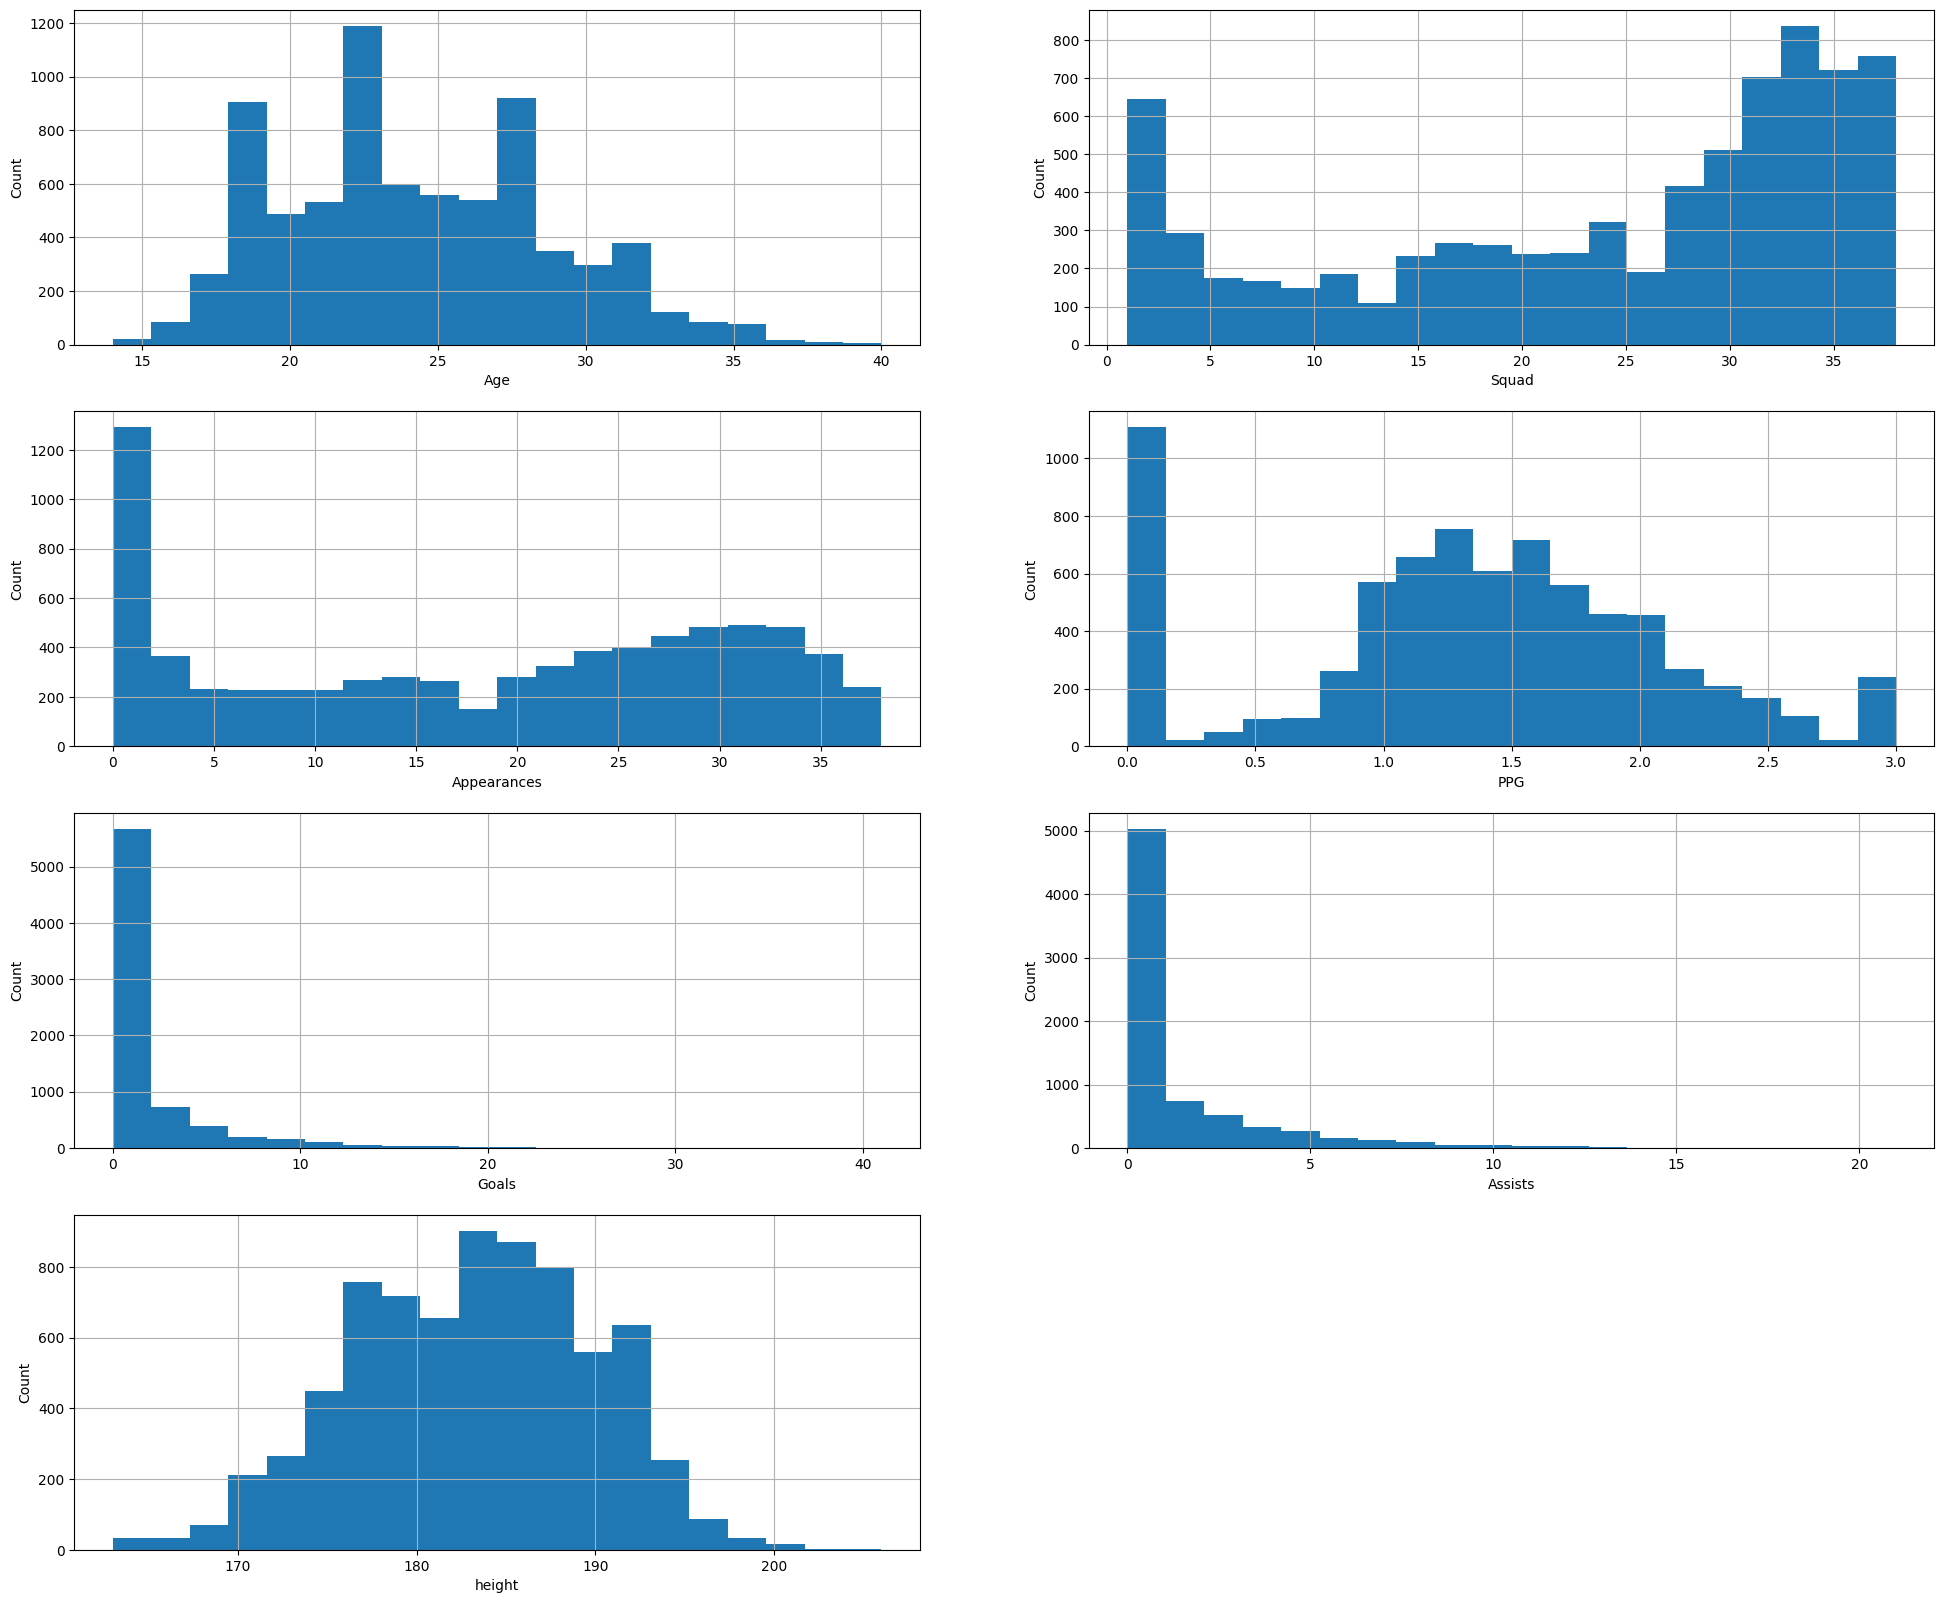

In [509]:
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df['Age'].hist(bins=20)
fig.set_xlabel('Age')
fig.set_ylabel('Count')


plt.subplot(4, 2, 2)
fig = df['Squad'].hist(bins=20)
fig.set_xlabel('Squad')
fig.set_ylabel('Count')


plt.subplot(4, 2, 3)
fig = df['Appearances'].hist(bins=20)
fig.set_xlabel('Appearances')
fig.set_ylabel('Count')



plt.subplot(4, 2, 4)
fig = df['PPG'].hist(bins=20)
fig.set_xlabel('PPG')
fig.set_ylabel('Count')



plt.subplot(4, 2, 5)
fig = df['Goals'].hist(bins=20)
fig.set_xlabel('Goals')
fig.set_ylabel('Count')

plt.subplot(4, 2, 6)
fig = df['Assists'].hist(bins=20)
fig.set_xlabel('Assists')
fig.set_ylabel('Count')


plt.subplot(4, 2, 7)
fig = df['height'].hist(bins=20)
fig.set_xlabel('height')
fig.set_ylabel('Count')

# Explore missing values in variables

In [510]:
df.isnull().sum()

Season                  0
Age                     0
position_group          0
Squad                   0
Appearances             0
PPG                     0
Goals                   0
Own goals               0
Clean sheets            0
Assists                 0
Penalty goals           0
Goals conceded          0
Yellow cards            0
Second yellow cards     0
Red cards               0
Substitutions on        0
Substitutions off       0
Minutes played          0
Minutes per goal        0
height                 79
foot                    0
dtype: int64

# fill missing values in height columns with mean of each group position

In [511]:
df['height'] = df['height'].fillna(df.groupby('position_group')['height'].transform('mean'))

In [512]:
df.isnull().sum()

Season                 0
Age                    0
position_group         0
Squad                  0
Appearances            0
PPG                    0
Goals                  0
Own goals              0
Clean sheets           0
Assists                0
Penalty goals          0
Goals conceded         0
Yellow cards           0
Second yellow cards    0
Red cards              0
Substitutions on       0
Substitutions off      0
Minutes played         0
Minutes per goal       0
height                 0
foot                   0
dtype: int64

# Outliers

Delete All index that Minutes played for player equal to zero

In [513]:
index=df[df['Minutes played']==0].index
len(index)

926

In [514]:
df[df['Minutes played']==0].head()

,Season,Age,position_group,Squad,Appearances,PPG,Goals,Own goals,Clean sheets,Assists,...,Goals conceded,Yellow cards,Second yellow cards,Red cards,Substitutions on,Substitutions off,Minutes played,Minutes per goal,height,foot
1,21/22,36,Goalkeeper,9,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,191.0,right
11,21/22,40,Goalkeeper,10,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,185.0,left
12,18/19,35,Goalkeeper,36,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,195.0,right
14,20/21,37,Goalkeeper,20,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,195.0,right
15,20/21,37,Goalkeeper,15,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,195.0,right


In [515]:
df.drop(index,axis=0,inplace=True)

In [516]:
df.columns

Index(['Season', 'Age', 'position_group', 'Squad', 'Appearances', 'PPG',
       'Goals', 'Own goals', 'Clean sheets', 'Assists', 'Penalty goals',
       'Goals conceded', 'Yellow cards', 'Second yellow cards', 'Red cards',
       'Substitutions on', 'Substitutions off', 'Minutes played',
       'Minutes per goal', 'height', 'foot'],
      dtype='object')

In [517]:
columns=['Age','Squad', 'Appearances',
       'PPG', 'Goals', 'Own goals', 'Clean sheets', 'Assists', 'Penalty goals',
       'Goals conceded', 'Yellow cards', 'Second yellow cards', 'Red cards',
       'Substitutions on', 'Substitutions off', 'Minutes played',
       'Minutes per goal']

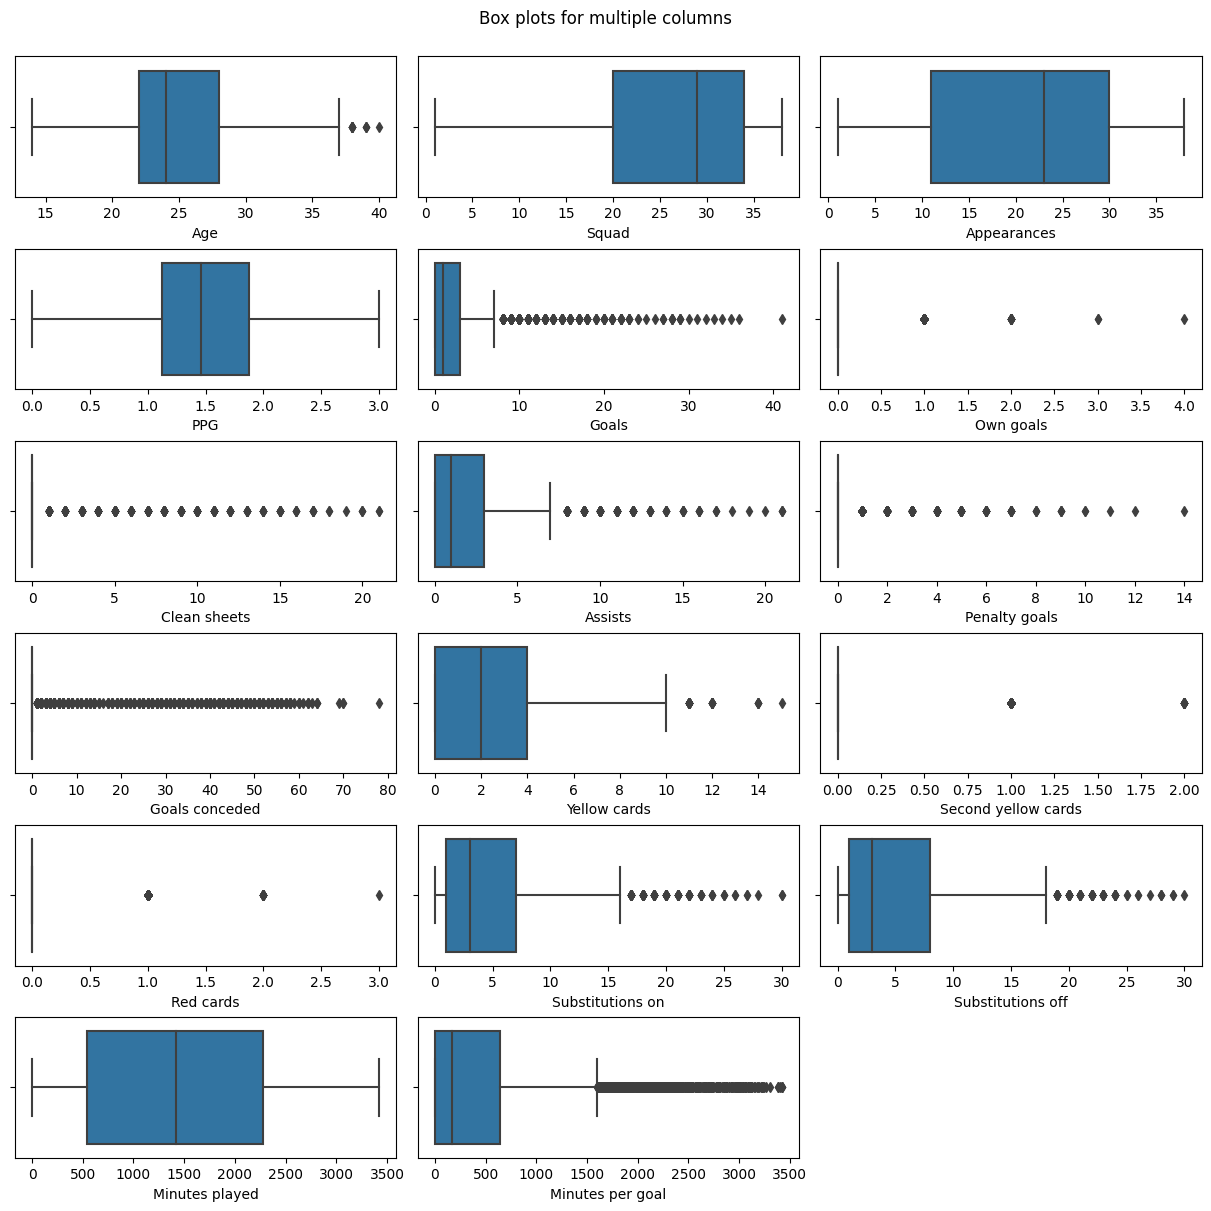

In [518]:
fig, axs = plt.subplots(nrows=6, ncols=3,figsize=(12,12),constrained_layout=True)
row=0
col=0
for i in range(len(columns)):
    sns.boxplot(data=df, x=columns[i],ax=axs[row,col])
   
    plt.subplots_adjust(hspace=0.003)
    col+=1
    if col==3:
      row+=1
      col=0
axs[-1,-1].remove()

plt.suptitle('Box plots for multiple columns'+'\n')
plt.show()

**Own_goals**
This column is generally considered as outlier data

In [519]:
df.drop(['Own goals'],axis=1,inplace=True)

In [520]:
df.shape

(6506, 20)

# Columns without Outliers:
1. Squad
2. Appearances
3. PPG
4. Minutes played

# Columns that are generall for every position with outliers:
1. Yellow cards
2. Second yellow cards
3. Red cards
4. Substitutions on
5. Substitutions off
6. Minutes played

In [521]:
df.shape

(6506, 20)

In [522]:
columns=['Yellow cards','Second yellow cards', 'Red cards', 'Substitutions on', 'Substitutions off', 'Minutes played']

In [523]:
for column in columns:
    q1, q3= np.quantile(df[column], q = [0.25, 0.75])
    iqr = q3 - q1
    outlier_index=df[~((q1 - 1.5*iqr <= df[column]) & (df[column]<= q3 + 1.5*iqr))].index
    print('Number of outliers in %s:' % (column,), len(outlier_index))
#     df.drop(outlier_index, inplace=True)

Number of outliers in Yellow cards: 44
Number of outliers in Second yellow cards: 375
Number of outliers in Red cards: 430
Number of outliers in Substitutions on: 158
Number of outliers in Substitutions off: 124
Number of outliers in Minutes played: 0


# Columns that depends on postion with outlier

Text(0.5, 0.98, 'Goals\n\n')

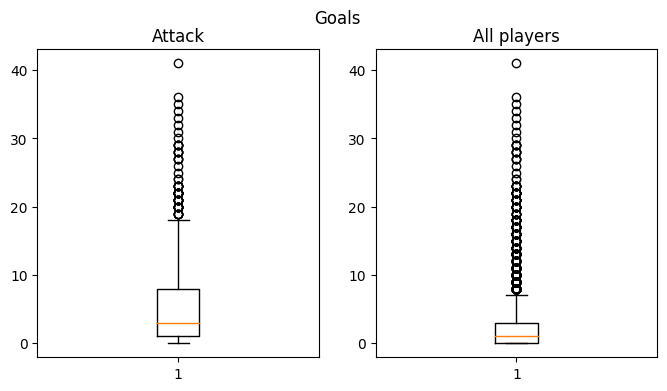

In [524]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

axs[0].boxplot(data=df[df['position_group']=='Attack'], x='Goals')
axs[0].set_title('Attack')
axs[1].boxplot(data=df, x='Goals')
axs[1].set_title('All players')
fig.suptitle('Goals\n\n')
# got outlier at upper end

In [525]:
q1, q3= np.quantile(df['Goals'], q = [0.25, 0.75])
iqr = q3 - q1

outlier_index=df[~((q1 - 1.5*iqr <= df['Goals']) & (df['Goals']<= q3 + 1.5*iqr))].index

In [526]:
print(len(outlier_index))

549


In [527]:
q1, q3= np.quantile(df[df['position_group']=='Attack']['Goals'], q = [0.25, 0.75])
iqr = q3 - q1

outlier_index=df[df['position_group']=='Attack'][~((q1 - 1.5*iqr <= df[df['position_group']=='Attack']['Goals']) & (df[df['position_group']=='Attack']['Goals']<= q3 + 1.5*iqr))].index

In [528]:
print(len(outlier_index))

62


62 palyers in Attack positions are outlier

In [529]:
df.drop(outlier_index, inplace=True)

In [530]:
df['position_group'].unique()

array(['Goalkeeper', 'midfield', 'Attack', 'Defender'], dtype=object)

# Goalkeepers:
1. Clean sheet
2. Goals conceded

Text(0.5, 0.98, 'Clean sheets\n\n')

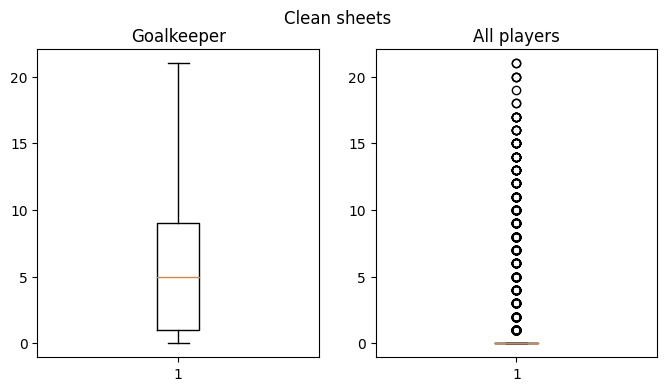

In [531]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

axs[0].boxplot(data=df[df['position_group']=='Goalkeeper'], x='Clean sheets')
axs[0].set_title('Goalkeeper')
axs[1].boxplot(data=df, x='Clean sheets')
axs[1].set_title('All players')
fig.suptitle('Clean sheets\n\n')
# got outlier at upper end

In [532]:
q1, q3= np.quantile(df['Clean sheets'], q = [0.25, 0.75])
iqr = q3 - q1

outlier_index=df[~((q1 - 1.5*iqr <= df['Clean sheets']) & (df['Clean sheets']<= q3 + 1.5*iqr))].index

In [533]:
print(len(outlier_index))

434


In [534]:
q1, q3= np.quantile(df[df['position_group']=='Goalkeeper']['Clean sheets'], q = [0.25, 0.75])
iqr = q3 - q1

outlier_index=df[df['position_group']=='Goalkeeper'][~((q1 - 1.5 *iqr <= df[df['position_group']=='Goalkeeper']['Clean sheets']) & (df[df['position_group']=='Goalkeeper']['Clean sheets']<= q3 + 1.5*iqr))].index

In [535]:
print(len(outlier_index))

0


NO outliers for Goalkeepers!!!!

Text(0.5, 0.98, 'Goals conceded\n\n')

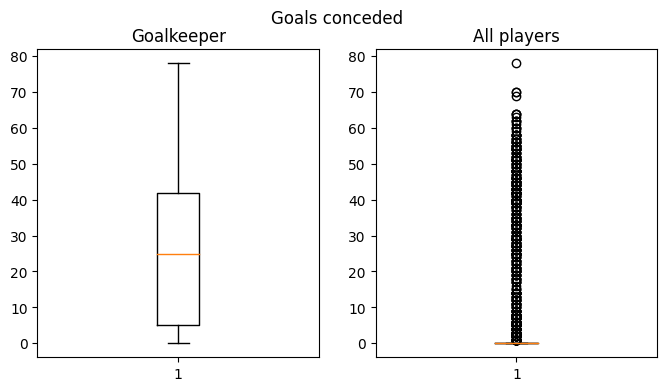

In [536]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

axs[0].boxplot(data=df[df['position_group']=='Goalkeeper'], x='Goals conceded')
axs[0].set_title('Goalkeeper')
axs[1].boxplot(data=df, x='Goals conceded')
axs[1].set_title('All players')
fig.suptitle('Goals conceded\n\n')
# got outlier at upper end

In [537]:
q1, q3= np.quantile(df[df['position_group']=='Goalkeeper']['Goals conceded'], q = [0.25, 0.75])
iqr = q3 - q1

outlier_index=df[df['position_group']=='Goalkeeper'][~((q1 - 1.5*iqr <= df[df['position_group']=='Goalkeeper']['Goals conceded']) & (df[df['position_group']=='Goalkeeper']['Goals conceded']<= q3 + 1.5*iqr))].index

In [538]:
print(len(outlier_index))

0


Text(0.5, 0.98, 'Penalty goals\n\n')

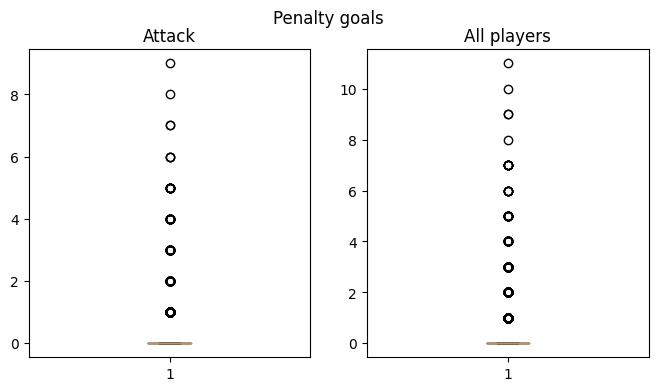

In [539]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

axs[0].boxplot(data=df[df['position_group']=='Attack'], x='Penalty goals')
axs[0].set_title('Attack')
axs[1].boxplot(data=df, x='Penalty goals')
axs[1].set_title('All players')
fig.suptitle('Penalty goals\n\n')
# got outlier at upper end

# We can remove this column too

In [540]:
df.drop(['Penalty goals'],axis=1,inplace=True)

Text(0.5, 0.98, 'Assists\n\n')

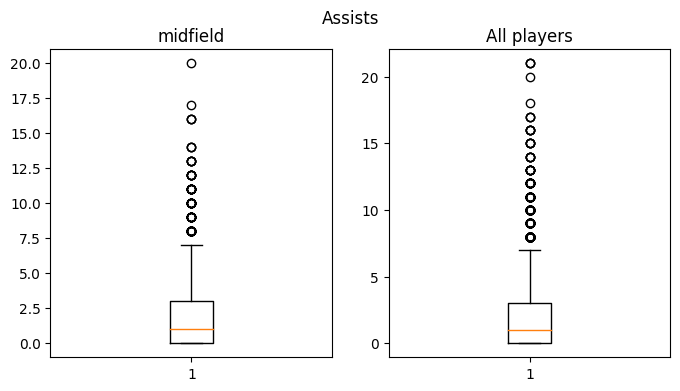

In [541]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

axs[0].boxplot(data=df[df['position_group']=='midfield'], x='Assists')
axs[0].set_title('midfield')
axs[1].boxplot(data=df, x='Assists')
axs[1].set_title('All players')
fig.suptitle('Assists\n\n')
# got outlier at upper end

In [542]:
q1, q3= np.quantile(df[df['position_group']=='midfield']['Assists'], q = [0.25, 0.75])
iqr = q3 - q1

outlier_index=df[df['position_group']=='midfield'][~((q1 - 1.5*iqr <= df[df['position_group']=='midfield']['Assists']) & (df[df['position_group']=='midfield']['Assists']<= q3 + 1.5*iqr))].index

In [543]:
print(len(outlier_index))

98


In [544]:
df.drop(outlier_index, axis=0, inplace=True)

In [545]:
df.shape

(6346, 19)

In [546]:
df=df.reset_index()

In [547]:
df

,index,Season,Age,position_group,Squad,Appearances,PPG,Goals,Clean sheets,Assists,Goals conceded,Yellow cards,Second yellow cards,Red cards,Substitutions on,Substitutions off,Minutes played,Minutes per goal,height,foot
0,0,17/18,32,Goalkeeper,10,2,1.50,0,0,0,6,0,0,0,0,0,180,0,191.0,right
1,2,17/18,31,midfield,37,32,2.06,0,0,3,0,3,0,0,16,3,1763,0,175.0,right
2,3,18/19,32,midfield,33,31,2.52,5,0,5,0,5,1,0,12,7,1785,357,175.0,right
3,4,19/20,33,midfield,27,22,2.91,2,0,2,0,4,0,0,13,2,926,463,175.0,right
4,5,20/21,34,midfield,30,26,1.73,0,0,1,0,3,0,0,15,5,1060,0,175.0,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6341,7413,21/22,17,Defender,2,1,1.00,0,0,0,0,0,0,0,1,0,3,0,178.0,right
6342,7414,21/22,16,Defender,11,1,3.00,0,0,0,0,0,0,0,1,0,11,0,182.0,left
6343,7417,21/22,15,Defender,5,1,3.00,0,0,0,0,0,0,0,1,0,12,0,190.0,right
6344,7428,21/22,17,Attack,7,3,2.00,1,0,0,0,0,0,0,3,0,35,35,182.0,right


Correlation matrix of dataframe

In [548]:
df.columns

Index(['index', 'Season', 'Age', 'position_group', 'Squad', 'Appearances',
       'PPG', 'Goals', 'Clean sheets', 'Assists', 'Goals conceded',
       'Yellow cards', 'Second yellow cards', 'Red cards', 'Substitutions on',
       'Substitutions off', 'Minutes played', 'Minutes per goal', 'height',
       'foot'],
      dtype='object')

In [549]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
encoded=le.fit_transform(df['position_group'])
encoded=pd.DataFrame(encoded)
df=pd.concat([df,encoded],axis=1)
df.rename(columns={0:'position'},inplace=True)

In [550]:
df.drop(['index','Season'],axis=1,inplace=True)

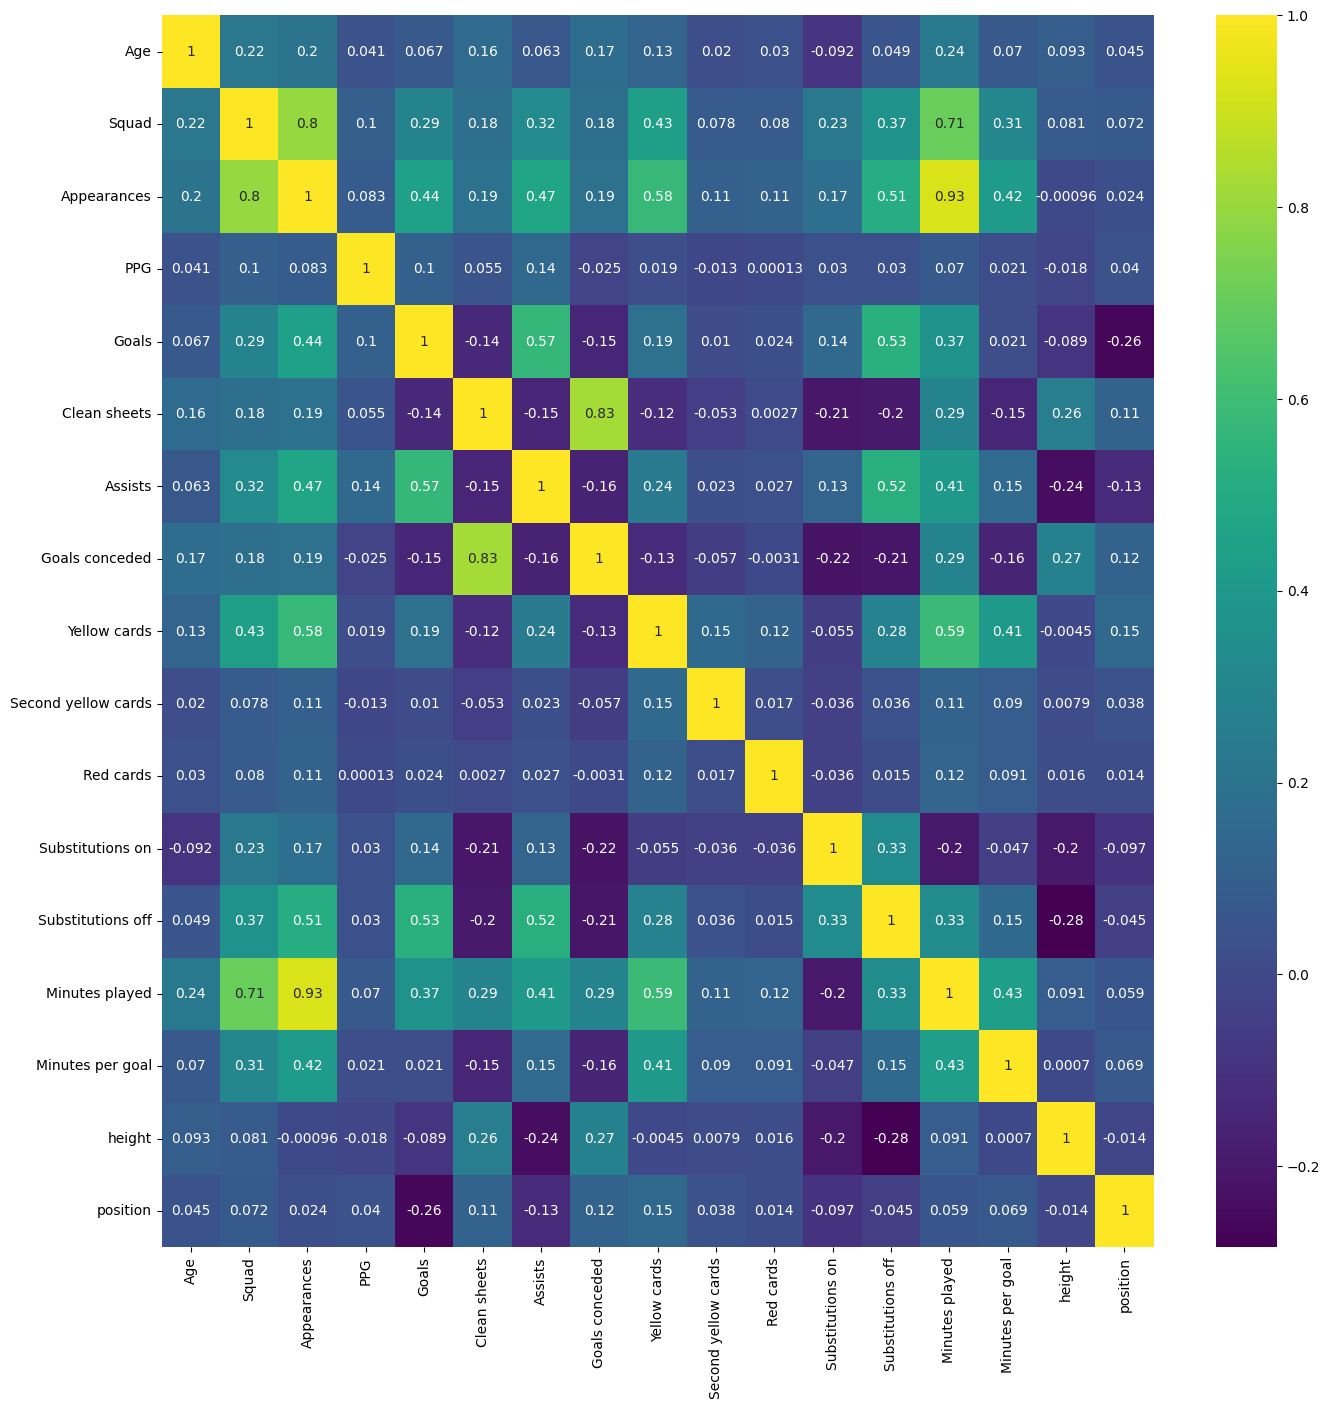

In [551]:
corr=df.drop(['position_group'],axis=1).corr()
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(corr,annot=True,cmap='viridis', ax=ax) 
plt.show()

In [552]:
X=df.drop(['position','position_group','foot'],axis=1)

# Feature Selection with sklearn

In [553]:
#TODOL calculate feature importance and initialize featuer_importance dataframe
from sklearn.feature_selection import mutual_info_classif
discrete_features_index=list(np.arange(1,16))
feature_importance=mutual_info_classif(X=X,y=df['position'],discrete_features=discrete_features_index, random_state=1401)
feature_importance = pd.DataFrame(data=feature_importance,columns=['fi'])
feature_importance.index=X.columns
feature_importance.sort_values(by=['fi'] , ascending=False, inplace=True)

In [554]:
feature_importance

,fi
Minutes played,0.693421
Minutes per goal,0.478062
Goals conceded,0.260345
Clean sheets,0.211029
Substitutions on,0.208532
Substitutions off,0.192906
Goals,0.175351
height,0.144987
Assists,0.111552
PPG,0.067657


In [555]:
X=X.drop(['Red cards','Second yellow cards'],axis=1)

In [556]:
Y=df[['position_group']]
Y.head()

,position_group
0,Goalkeeper
1,midfield
2,midfield
3,midfield
4,midfield


# Feature selection

Correlation matrix of features with each others

In [557]:
corr=X.corr(method='pearson')

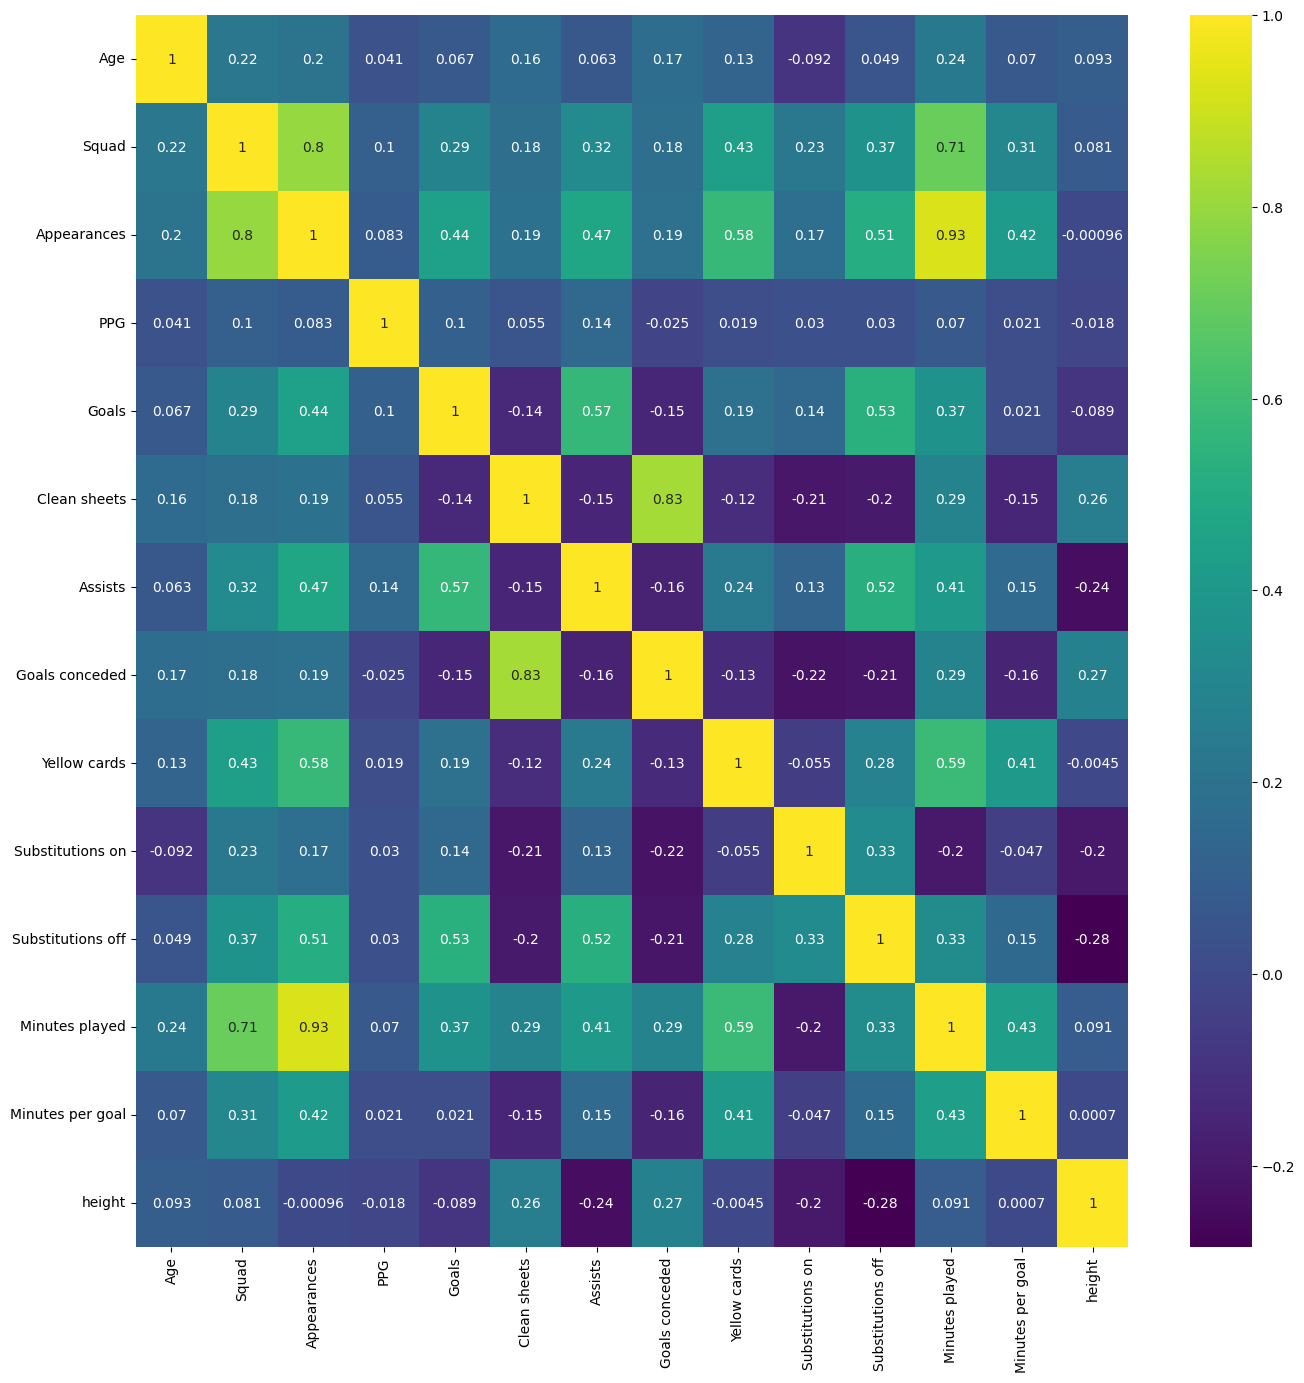

In [558]:
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(corr,annot=True,cmap='viridis', ax=ax) 
plt.show()

Two features Appearances and squad have a strong correlation with Minutes played

Clean sheets and Goals conceded have a strong correlation with each others

In [559]:
X=X.drop(['Appearances','Squad','Clean sheets'],axis=1)
X.head()

,Age,PPG,Goals,Assists,Goals conceded,Yellow cards,Substitutions on,Substitutions off,Minutes played,Minutes per goal,height
0,32,1.50,0,0,6,0,0,0,180,0,191.0
1,31,2.06,0,3,0,3,16,3,1763,0,175.0
2,32,2.52,5,5,0,5,12,7,1785,357,175.0
3,33,2.91,2,2,0,4,13,2,926,463,175.0
4,34,1.73,0,1,0,3,15,5,1060,0,175.0


# Clustering 

In [560]:
from sklearn.cluster import KMeans
cost = []

for i in range(1,15):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0, n_init=5)
    kmeans.fit(X)
    cost.append(kmeans.inertia_)

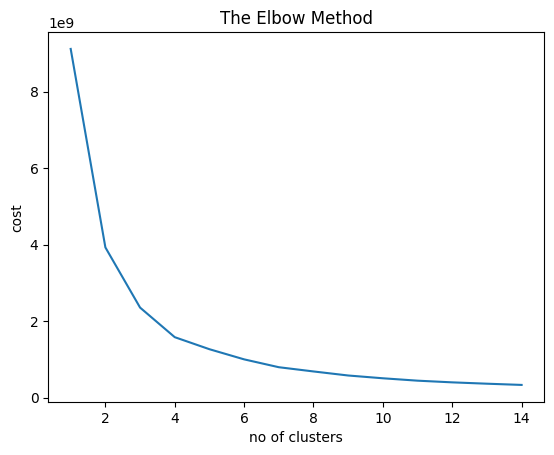

In [561]:
plt.plot(range(1,15), cost)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('cost')
plt.show()

In [562]:
X_copy=X.copy()

In [563]:
kmeans_cluster = KMeans(n_clusters= 4 , init='k-means++', random_state=0)
X_copy['cluster'] = kmeans_cluster.fit_predict(X)
X_copy

,Age,PPG,Goals,Assists,Goals conceded,Yellow cards,Substitutions on,Substitutions off,Minutes played,Minutes per goal,height,cluster
0,32,1.50,0,0,6,0,0,0,180,0,191.0,1
1,31,2.06,0,3,0,3,16,3,1763,0,175.0,2
2,32,2.52,5,5,0,5,12,7,1785,357,175.0,2
3,33,2.91,2,2,0,4,13,2,926,463,175.0,2
4,34,1.73,0,1,0,3,15,5,1060,0,175.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6341,17,1.00,0,0,0,0,1,0,3,0,178.0,1
6342,16,3.00,0,0,0,0,1,0,11,0,182.0,1
6343,15,3.00,0,0,0,0,1,0,12,0,190.0,1
6344,17,2.00,1,0,0,0,3,0,35,35,182.0,1


# Encoding

encoding target value column (main_position)

In [566]:
Y

,position_group
0,Goalkeeper
1,midfield
2,midfield
3,midfield
4,midfield
...,...
6341,Defender
6342,Defender
6343,Defender
6344,Attack


In [567]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit(Y)
# Y=le.transform(Y)
# Y

In [568]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
Y=enc.fit_transform(Y).toarray()
Y

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

# Train_test_split

In [569]:
X=X.drop(['Age'],axis=1)

In [570]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [571]:
X_train.shape

(5076, 10)

In [572]:
X_test.shape

(1270, 10)

In [573]:
y_train

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

# feature scailing

In [574]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [575]:
X_train

array([[-0.11586923,  3.52474636,  1.9353789 , ...,  1.75543128,
        -0.31309367,  0.45606148],
       [-0.310364  , -0.62769973, -0.70441239, ...,  1.5844241 ,
        -0.66635585,  0.90794186],
       [-0.34277979, -0.3082808 ,  0.61548325, ...,  1.14265556,
         3.0450957 ,  0.75731507],
       ...,
       [ 1.74803899,  0.01113813,  1.05544847, ...,  0.33546097,
         0.60890594, -0.29707249],
       [ 2.44497859, -0.62769973, -0.70441239, ..., -1.42448789,
        -0.66635585, -0.14644569],
       [-0.06724553, -0.62769973,  0.61548325, ..., -0.55621931,
        -0.66635585, -1.20083325]])

# Best model is GradientBoostingClassifier
best F1 score: 67

# Model Selection & Evaluation

# XGBClassifier

In [608]:
import xgboost as xgb
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score

# create XGBoost instance with default hyper-parameters
xgb_estimator = xgb.XGBClassifier(objective='binary:logistic',max_depth=3, n_estimators=80)

# create MultiOutputClassifier instance with XGBoost model inside
multilabel_model = MultiOutputClassifier(xgb_estimator)

# fit the model
multilabel_model.fit(X_train, y_train)

# evaluate on test data
print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, multilabel_model.predict(X_test))*100))
print('Accuracy on train data: {:.1f}%'.format(accuracy_score(y_train, multilabel_model.predict(X_train))*100))

print('F1 score on test data: {:.1f}%'.format(accuracy_score(y_test, multilabel_model.predict(X_test))*100))
print('F1 score on train data: {:.1f}%'.format(accuracy_score(y_train, multilabel_model.predict(X_train))*100))

Accuracy on test data: 60.7%
Accuracy on train data: 68.6%
F1 score on test data: 60.7%
F1 score on train data: 68.6%


# GradientBoostingClassifier (multiclass)

In [611]:
from sklearn.ensemble import GradientBoostingClassifier


param_grid = {'estimator__min_samples_split':[10, 50],
              'estimator__min_samples_leaf':[50, 150]}

gb = GradientBoostingClassifier(n_estimators=300,learning_rate=.1)
gs = GridSearchCV(MultiOutputClassifier(gb), param_grid=param_grid)

gs.fit(X_train, y_train)

GridSearchCV(estimator=MultiOutputClassifier(estimator=GradientBoostingClassifier(n_estimators=300)),
             param_grid={'estimator__min_samples_leaf': [50, 150],
                         'estimator__min_samples_split': [10, 50]})

In [612]:
gs.best_params_

{'estimator__min_samples_leaf': 50, 'estimator__min_samples_split': 10}

In [613]:
print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, gs.predict(X_test))*100))
print('Accuracy on train data: {:.1f}%'.format(accuracy_score(y_train, gs.predict(X_train))*100))

print('test f1 score:',f1_score(y_test, gs.predict(X_test) , average='weighted'))
print('train f1 score:',f1_score(y_train, gs.predict(X_train), average='weighted'))

Accuracy on test data: 61.3%
Accuracy on train data: 70.3%
test f1 score: 0.6766909301888254
train f1 score: 0.7692161056558867


In [614]:
pred=gs.predict(X_test)
pred

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])